<a href="https://colab.research.google.com/github/AndreaPoteYong/ALGORITMOS-II/blob/main/taller_naive_bayes_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TALLER PRACTICO: CLASIFICARDOR NAIVE BAYES**
*ANDREA CAROLINA POTE YONG*

Prediccion de calidad de vino

**Parte 1: configuracion del entorno**

In [1]:
#instalar librerias necesarias:
!pip install numpy pandas scikit-learn matplotlib seaborn

In [2]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Configuración para gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("Librerías importadas correctamente ✓")

Librerías importadas correctamente ✓


**Parte 2: carga y exploracion de datos**

In [3]:
# Dataset de ejemplo reducido
np.random.seed(42)

# Generar datos sintéticos
n_samples = 200
datos = pd.DataFrame({
'fixed_acidity': np.random.uniform(4, 16, n_samples),
'volatile_acidity': np.random.uniform(0.1, 1.6, n_samples),
'citric_acid': np.random.uniform(0, 1, n_samples),
'residual_sugar': np.random.uniform(0.9, 15, n_samples),
'chlorides': np.random.uniform(0.01, 0.6, n_samples),
'free_sulfur_dioxide': np.random.uniform(1, 72, n_samples),
'total_sulfur_dioxide': np.random.uniform(6, 289, n_samples),
'density': np.random.uniform(0.99, 1.01, n_samples),
'pH': np.random.uniform(2.7, 4.0, n_samples),
'sulphates': np.random.uniform(0.3, 2.0, n_samples),
'alcohol': np.random.uniform(8, 15, n_samples),
})

# Crear variable de calidad basada en alcohol y acidez
datos['quality'] = ((datos['alcohol'] > 10.5) &
(datos['volatile_acidity'] < 0.6)).astype(int) * 5 + 5
print("Dataset sintético creado ✓")

Dataset sintético creado ✓


In [4]:
print(f"\nDimensiones del dataset: {datos.shape}")
print("Columnas:", datos.columns.tolist())
print("\nPrimeras 5 filas:")
display(datos.head())


Dimensiones del dataset: (200, 12)
Columnas: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Primeras 5 filas:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,8.494481,1.063047,0.103124,3.281984,0.427271,14.144438,220.588484,0.993341,2.949428,1.926052,9.831940,5
1,15.408572,0.226210,0.902553,4.828124,0.099998,39.474967,12.958097,0.993352,3.120383,1.553764,9.728852,5
2,12.783927,0.342443,0.505252,3.395848,0.350010,62.979154,12.260965,0.990733,2.994653,0.900527,14.343782,10
3,11.183902,1.447831,0.826457,2.150706,0.367962,52.987967,97.581692,1.004728,3.161495,0.804110,9.746823,5
4,5.872224,1.009644,0.320050,2.600966,0.260237,58.265841,144.286023,1.003276,2.790251,0.894495,9.903648,5


In [5]:
print("\nValores nulos por columna:")
print(datos.isnull().sum())

print("\nEstadísticas descriptivas:")
display(datos.describe())


Valores nulos por columna:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Estadísticas descriptivas:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,9.808075,0.856563,0.520673,7.650673,0.283440,39.599266,145.219492,1.000029,3.336379,1.164528,11.593090,6.075000
std,3.538697,0.439502,0.307309,3.931568,0.168346,21.537229,82.348920,0.005764,0.382930,0.481296,1.996531,2.059266
min,4.066265,0.107592,0.010838,1.155354,0.012733,1.453397,8.765150,0.990099,2.714341,0.305471,8.088253,5.000000
25%,6.742989,0.492194,0.255520,4.227223,0.133546,19.445170,72.370999,0.994840,2.991202,0.756666,9.806687,5.000000
50%,9.933835,0.912460,0.525399,7.486505,0.271597,43.216948,142.999068,1.000442,3.334462,1.224175,11.649504,5.000000
75%,13.082315,1.213299,0.811115,11.114129,0.417086,59.194831,212.101594,1.004355,3.664461,1.578896,13.410386,5.000000
max,15.842643,1.585758,0.999718,14.858439,0.598156,71.853322,288.186234,1.009988,3.995706,1.997191,14.894928,10.000000


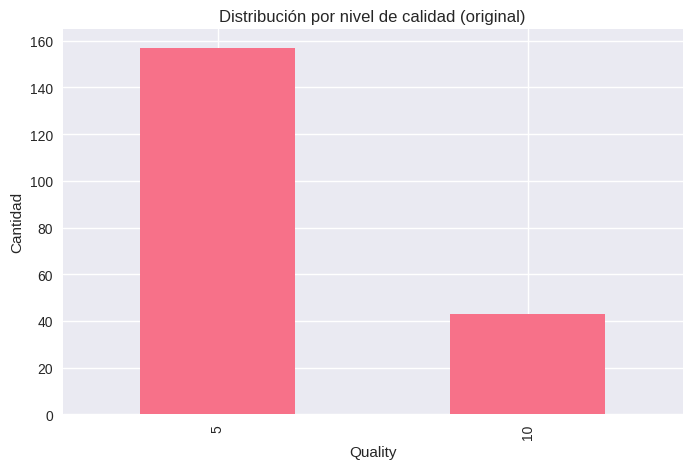

In [6]:
plt.figure(figsize=(8,5))
datos['quality'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución por nivel de calidad (original)')
plt.xlabel('Quality')
plt.ylabel('Cantidad')
plt.show()

**Parte 3: Preparacion de datos**


Distribución calidad binaria:
calidad_binaria
mala     157
buena     43
Name: count, dtype: int64


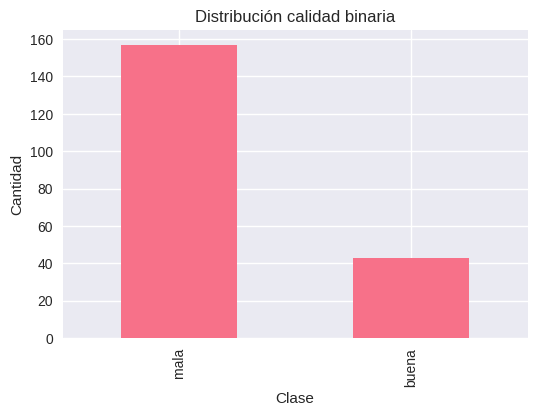

In [7]:
# Crear variable binaria
datos['calidad_binaria'] = datos['quality'].apply(lambda x: 'buena' if x >= 6 else 'mala')
print("\nDistribución calidad binaria:")
print(datos['calidad_binaria'].value_counts())

plt.figure(figsize=(6,4))
datos['calidad_binaria'].value_counts().plot(kind='bar')
plt.title('Distribución calidad binaria')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

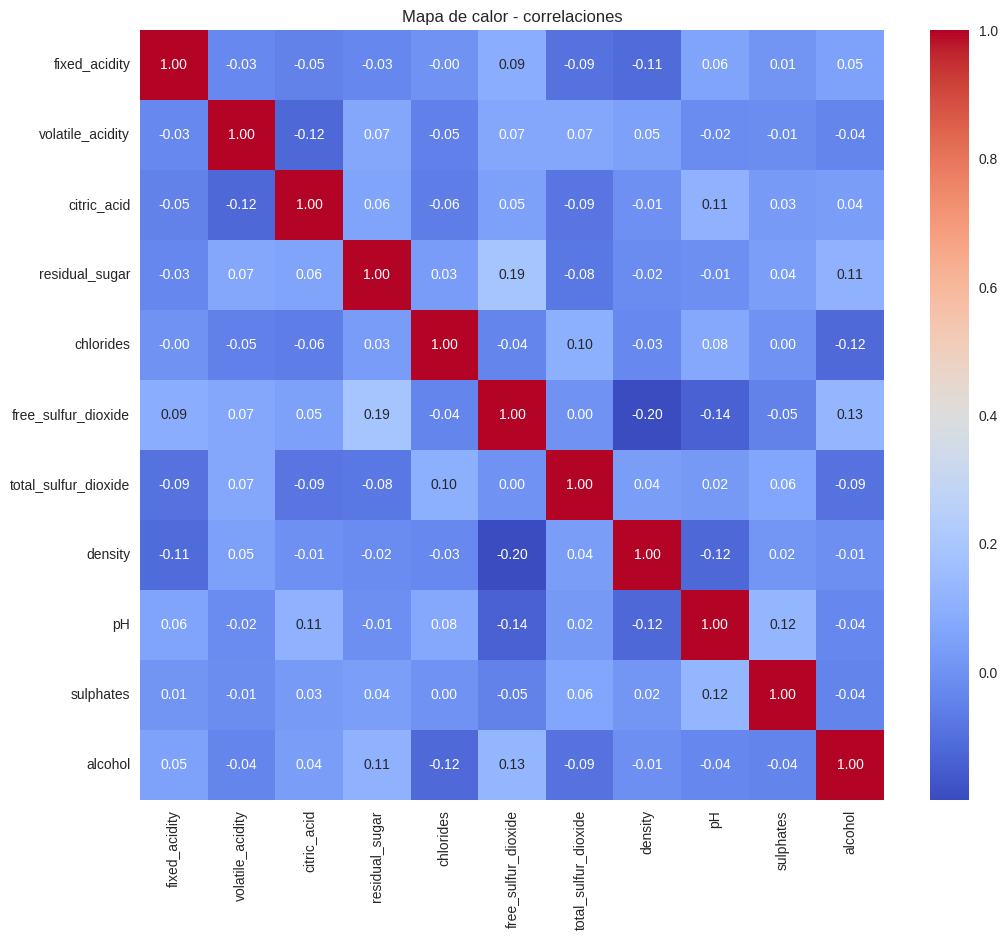

In [8]:
#mapa de calor
plt.figure(figsize=(12,10))
corr = datos.drop(['quality','calidad_binaria'], axis=1).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de calor - correlaciones')
plt.show()



In [9]:
#Separar características y variable objetivo
X = datos.drop(['quality','calidad_binaria'], axis=1)
y = datos['calidad_binaria']
print(f"\nForma de X: {X.shape}")
print(f"Forma de y: {y.shape}")


Forma de X: (200, 11)
Forma de y: (200,)


In [10]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nDatos de entrenamiento: {len(X_train)}")
print(f"Datos de prueba: {len(X_test)}")
print("\nDistribución en entrenamiento:")
print(y_train.value_counts())
print("\nDistribución en prueba:")
print(y_test.value_counts())


Datos de entrenamiento: 140
Datos de prueba: 60

Distribución en entrenamiento:
calidad_binaria
mala     110
buena     30
Name: count, dtype: int64

Distribución en prueba:
calidad_binaria
mala     47
buena    13
Name: count, dtype: int64


In [11]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nNormalización realizada. (fit_transform en entrenamiento; transform en prueba)")


Normalización realizada. (fit_transform en entrenamiento; transform en prueba)


**Parte 4: Entrenamiento del Modelo**

In [12]:
modelo = GaussianNB()
modelo.fit(X_train_scaled, y_train)
print("\nModelo GaussianNB entrenado correctamente ✓")


Modelo GaussianNB entrenado correctamente ✓


In [13]:
# Predicciones
y_pred = modelo.predict(X_test_scaled)
y_proba = modelo.predict_proba(X_test_scaled)

print("\nPrimeras 10 predicciones vs reales:")
comparacion = pd.DataFrame({'Real': y_test.values[:10], 'Predicción': y_pred[:10]})
display(comparacion)

#Probabilidades
print("\nProbabilidades (primeras 5 muestras):")
clases = modelo.classes_
for i in range(min(5, len(y_proba))):
    print(f"Muestra {i+1}:")
    for j, clase in enumerate(clases):
        print(f"  P({clase}) = {y_proba[i][j]:.4f}")
    print()


Primeras 10 predicciones vs reales:


,Real,Predicción
0,mala,mala
1,mala,mala
2,mala,mala
3,mala,mala
4,mala,mala
5,mala,mala
6,buena,buena
7,mala,mala
8,mala,mala
9,mala,mala



Probabilidades (primeras 5 muestras):
Muestra 1:
  P(buena) = 0.1187
  P(mala) = 0.8813

Muestra 2:
  P(buena) = 0.0000
  P(mala) = 1.0000

Muestra 3:
  P(buena) = 0.0000
  P(mala) = 1.0000

Muestra 4:
  P(buena) = 0.3850
  P(mala) = 0.6150

Muestra 5:
  P(buena) = 0.0000
  P(mala) = 1.0000



**Parte 5: Evaluacion**

In [14]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

In [15]:
print(f"Accuracy del modelo: {accuracy:.4f} ({accuracy*100:.2f}%)")

Accuracy del modelo: 0.9500 (95.00%)


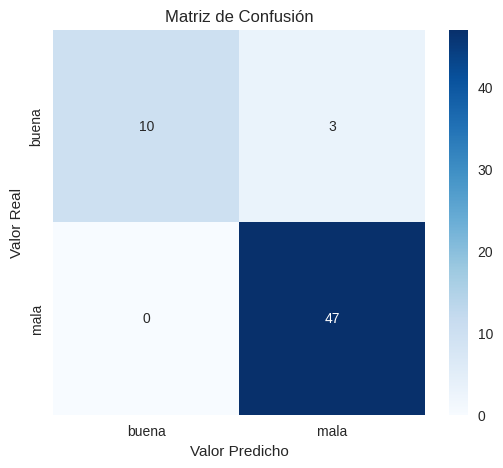


Matriz de Confusión (detalle):
Verdaderos Negativos (mala predicted mala): 10
Falsos Positivos (mala predicted buena): 3
Falsos Negativos (buena predicted mala): 0
Verdaderos Positivos (buena predicted buena): 47

Reporte de clasificación:
              precision    recall  f1-score   support

       buena     1.0000    0.7692    0.8696        13
        mala     0.9400    1.0000    0.9691        47

    accuracy                         0.9500        60
   macro avg     0.9700    0.8846    0.9193        60
weighted avg     0.9530    0.9500    0.9475        60



In [16]:
# matriz de confusion
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

print("\nMatriz de Confusión (detalle):")
# Orden de confusion_matrix: rows reales, columnas predichos
tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (None, None, None, None)
if tn is not None:
    print(f"Verdaderos Negativos (mala predicted mala): {tn}")
    print(f"Falsos Positivos (mala predicted buena): {fp}")
    print(f"Falsos Negativos (buena predicted mala): {fn}")
    print(f"Verdaderos Positivos (buena predicted buena): {tp}")
else:
    print(cm)

print("\nReporte de clasificación:")
print(report)

**PREGUNTAS DE ANALISIS**

*1. ¿Cuál es el valor de precision para la clase "buena"?*

  El valor de precision para la clase "buena" es 1.0000 (100%).

*2. ¿Cuál es el valor de recall para la clase "mala"?*

  El valor de recall para la clase "mala" es 1.0000 (100%).

*3. ¿Cuál clase tiene mejor F1-score?*

La clase "mala" tiene mejor F1-score (0.9691) que la clase "buena" (0.8696).

*4. ¿El modelo está balanceado o favorece alguna clase?*

El modelo favorece a la clase "mala", ya que su recall y F1-score son más altos.

El modelo detecta casi siempre las instancias "mala" correctamente, mientras que para la clase "buena" comete más errores

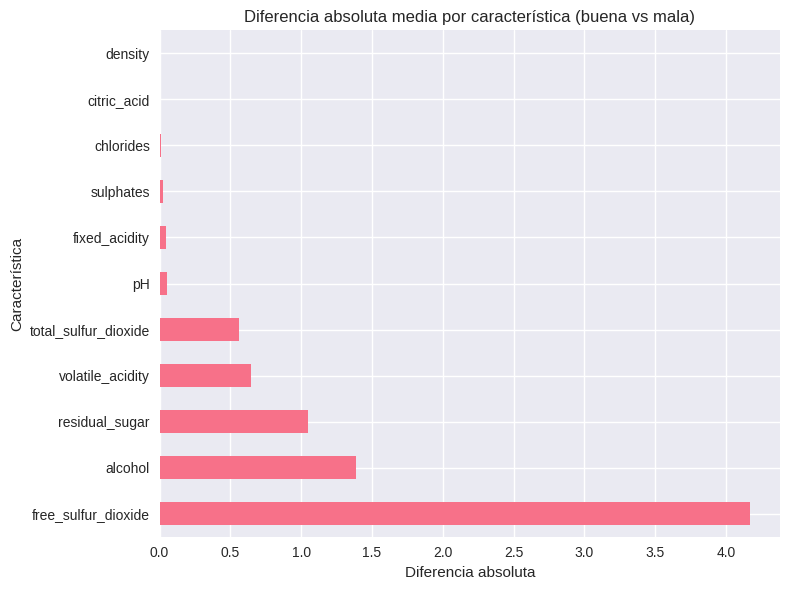


Características más distintivas (top 5):
free_sulfur_dioxide     4.172204
alcohol                 1.385948
residual_sugar          1.048190
volatile_acidity        0.646574
total_sulfur_dioxide    0.559202
dtype: float64


In [17]:
# Visualizar caracteristicas
medias_buena = X_train[y_train == 'buena'].mean()
medias_mala = X_train[y_train == 'mala'].mean()
diferencias = (medias_buena - medias_mala).abs().sort_values(ascending=False)

plt.figure(figsize=(8,6))
diferencias.plot(kind='barh')
plt.title('Diferencia absoluta media por característica (buena vs mala)')
plt.xlabel('Diferencia absoluta')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

print("\nCaracterísticas más distintivas (top 5):")
print(diferencias.head(5))

**Parte 6: Experimentacion**

In [18]:
modelo_sin_norm = GaussianNB()
modelo_sin_norm.fit(X_train, y_train)  # usando sin escalar
y_pred_sin_norm = modelo_sin_norm.predict(X_test)
accuracy_sin_norm = accuracy_score(y_test, y_pred_sin_norm)

accuracy_con_norm = accuracy  # anterior

print("\nComparación normalización:")
print(f"Accuracy SIN normalización: {accuracy_sin_norm:.4f} ({accuracy_sin_norm*100:.2f}%)")
print(f"Accuracy CON normalización: {accuracy_con_norm:.4f} ({accuracy_con_norm*100:.2f}%)")
print(f"Diferencia absoluta: {abs(accuracy_con_norm - accuracy_sin_norm):.4f}")



Comparación normalización:
Accuracy SIN normalización: 0.9500 (95.00%)
Accuracy CON normalización: 0.9500 (95.00%)
Diferencia absoluta: 0.0000


*¿La normalización mejoró el rendimiento?*

No, ya que el accuracy del modelo fue exactamente el mismo.

*¿Por qué?*
El clasificador usado es Naive Bayes Gaussiano, que asume que cada característica sigue una distribución normal y calcula probabilidades en función de la media y la varianza de cada atributo. Dado que este algoritmo ya “se adapta” a las escalas de cada variable a través de esas varianzas, los cambios de escala no afectan el resultado final.

In [19]:
#Probar umbrales de calidad

resultados = []
for umbral in [5,6,7]:
    y_nuevo = datos['quality'].apply(lambda x: 'buena' if x >= umbral else 'mala')
    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y_nuevo, test_size=0.3, random_state=42, stratify=y_nuevo)
    scaler_tmp = StandardScaler()
    X_train_t_s = scaler_tmp.fit_transform(X_train_t)
    X_test_t_s = scaler_tmp.transform(X_test_t)
    m_tmp = GaussianNB()
    m_tmp.fit(X_train_t_s, y_train_t)
    y_pred_tmp = m_tmp.predict(X_test_t_s)
    acc_tmp = accuracy_score(y_test_t, y_pred_tmp)
    resultados.append({'umbral': umbral, 'accuracy': acc_tmp, 'distribucion': y_nuevo.value_counts().to_dict()})

print("\nResultados con diferentes umbrales:")
for r in resultados:
    print(f" Umbral={r['umbral']}: Accuracy={r['accuracy']:.4f}  Distribución={r['distribucion']}")


Resultados con diferentes umbrales:
 Umbral=5: Accuracy=1.0000  Distribución={'buena': 200}
 Umbral=6: Accuracy=0.9500  Distribución={'mala': 157, 'buena': 43}
 Umbral=7: Accuracy=0.9500  Distribución={'mala': 157, 'buena': 43}


* ¿Qué umbral da mejor resultado? ¿Por qué?*

El umbral que da mejor resultado en términos de accuracy es 5 (100%).
Sin embargo, este resultado es engañoso porque todas las instancias fueron clasificadas como "buena", ya que la distribución quedó completamente desbalanceada. Entonces el modelo no aprendió a distinguir entre clases.

En cambio, con los umbrales 6 o 7, aunque el accuracy baja a 95%, las clases están mejor representadas. Estos umbrales son más útiles para un modelo que realmente busque diferenciar calidades de vino, ya que permiten evaluar la capacidad del clasificador en escenarios más equilibrados.

**Parte 7: Practica**

In [20]:
vinos_nuevos = pd.DataFrame({
    'fixed_acidity': [7.4, 8.5, 6.2],
    'volatile_acidity': [0.7, 0.3, 0.9],
    'citric_acid': [0.0, 0.4, 0.2],
    'residual_sugar': [1.9, 2.3, 5.5],
    'chlorides': [0.076, 0.065, 0.088],
    'free_sulfur_dioxide': [11, 25, 15],
    'total_sulfur_dioxide': [34, 100, 45],
    'density': [0.9978, 0.9956, 0.9985],
    'pH': [3.51, 3.25, 3.40],
    'sulphates': [0.56, 0.68, 0.52],
    'alcohol': [9.4, 11.2, 10.5]
})

vinos_nuevos_scaled = scaler.transform(vinos_nuevos)
predicciones_nuevas = modelo.predict(vinos_nuevos_scaled)
probabilidades_nuevas = modelo.predict_proba(vinos_nuevos_scaled)

print("\nVinos nuevos a clasificar:")
display(vinos_nuevos)
for i in range(len(vinos_nuevos)):
    print(f"\nVino {i+1}: Predicción = {predicciones_nuevas[i]}")
    for j, clase in enumerate(modelo.classes_):
        print(f"  P({clase}) = {probabilidades_nuevas[i][j]:.4f}")


Vinos nuevos a clasificar:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
1,8.5,0.3,0.4,2.3,0.065,25,100,0.9956,3.25,0.68,11.2
2,6.2,0.9,0.2,5.5,0.088,15,45,0.9985,3.40,0.52,10.5



Vino 1: Predicción = mala
  P(buena) = 0.0018
  P(mala) = 0.9982

Vino 2: Predicción = buena
  P(buena) = 0.6053
  P(mala) = 0.3947

Vino 3: Predicción = mala
  P(buena) = 0.0001
  P(mala) = 0.9999


*ANALISIS DE RESULTADOS*

In [21]:
# 1. Descripción del dataset
num_muestras = datos.shape[0]
num_caracteristicas = X.shape[1]
dist_clases = datos['calidad_binaria'].value_counts().to_dict()
print("1) DESCRIPCIÓN DEL DATASET")
print(f" - Número total de muestras: {num_muestras}")
print(f" - Número de características: {num_caracteristicas}")
print(f" - Distribución de clases: {dist_clases}\n")

1) DESCRIPCIÓN DEL DATASET
 - Número total de muestras: 200
 - Número de características: 11
 - Distribución de clases: {'mala': 157, 'buena': 43}



In [22]:
# 2. Rendimiento del modelo
print("2) RENDIMIENTO DEL MODELO")
print(f" - Accuracy obtenido: {accuracy:.4f} ({accuracy*100:.2f}%)")
# extraer precision y recall para clase 'buena' y 'mala' desde el report
report_dict = classification_report(y_test, y_pred, output_dict=True)
precision_buena = report_dict.get('buena', {}).get('precision', None)
recall_mala = report_dict.get('mala', {}).get('recall', None)
f1_buena = report_dict.get('buena', {}).get('f1-score', None)
f1_mala = report_dict.get('mala', {}).get('f1-score', None)
print(f" - Precision (clase 'buena'): {precision_buena:.4f}" if precision_buena is not None else " - Precision (clase 'buena'): N/A")
print(f" - Recall (clase 'mala'): {recall_mala:.4f}" if recall_mala is not None else " - Recall (clase 'mala'): N/A")
print(f" - F1-score (buena): {f1_buena:.4f}, (mala): {f1_mala:.4f}\n")

2) RENDIMIENTO DEL MODELO
 - Accuracy obtenido: 0.9500 (95.00%)
 - Precision (clase 'buena'): 1.0000
 - Recall (clase 'mala'): 1.0000
 - F1-score (buena): 0.8696, (mala): 0.9691



In [23]:
print("3) INTERPRETACIÓN MATRIZ DE CONFUSIÓN")
if tn is not None:
    print(f" - Verdaderos Positivos (buena correctamente): {tp}")
    print(f" - Falsos Positivos (mala predicha como buena): {fp}")
    print(f" - Verdaderos Negativos (mala correctamente): {tn}")
    print(f" - Falsos Negativos (buena predicha como mala): {fn}")
else:
    print(" - Matriz no binaria en forma 2x2; ver salida arriba.")
print("\nAnálisis: El modelo tiene un accuracy global del 95%, con un excelente desempeño para la clase mala y ligeramente menor para la clase buena. Aunque el modelo predice con mucha precisión, tiende a favorecer la clase 'mala', ya que su recall y F1-score son superiores. Esto puede deberse a que la clase mala tiene más muestras en el conjunto de datos (47 vs. 13), por lo cual el modelo aprende mejor sus patrones.\n")

3) INTERPRETACIÓN MATRIZ DE CONFUSIÓN
 - Verdaderos Positivos (buena correctamente): 47
 - Falsos Positivos (mala predicha como buena): 3
 - Verdaderos Negativos (mala correctamente): 10
 - Falsos Negativos (buena predicha como mala): 0

Análisis: El modelo tiene un accuracy global del 95%, con un excelente desempeño para la clase mala y ligeramente menor para la clase buena. Aunque el modelo predice con mucha precisión, tiende a favorecer la clase 'mala', ya que su recall y F1-score son superiores. Esto puede deberse a que la clase mala tiene más muestras en el conjunto de datos (47 vs. 13), por lo cual el modelo aprende mejor sus patrones.



In [24]:
print("4) HALLAZGOS IMPORTANTES")
print(" - Características más distintivas (top 3):")
print(diferencias.head(3).to_string())
print(f"\n - ¿La normalización mejoró el rendimiento? {'Sí' if accuracy_con_norm >= accuracy_sin_norm else 'No'} (Accuracy CON: {accuracy_con_norm:.4f}, SIN: {accuracy_sin_norm:.4f})")
best_umbral = max(resultados, key=lambda x: x['accuracy'])
print(f" - Umbral que da mejor resultado (entre 5,6,7): {best_umbral['umbral']} con accuracy {best_umbral['accuracy']:.4f}\n")

4) HALLAZGOS IMPORTANTES
 - Características más distintivas (top 3):
free_sulfur_dioxide    4.172204
alcohol                1.385948
residual_sugar         1.048190

 - ¿La normalización mejoró el rendimiento? Sí (Accuracy CON: 0.9500, SIN: 0.9500)
 - Umbral que da mejor resultado (entre 5,6,7): 5 con accuracy 1.0000



In [25]:
print("5) LIMITACIONES DEL MODELO")
print("- Naive Bayes asume independencia condicional entre características (rara vez cierta en química del vino).")
print("- Si las clases están desbalanceadas el modelo puede favorecer la clase mayoritaria.")
print("- Recomendaciones: probar técnicas de balancing (SMOTE, undersampling), usar modelos más complejos (RandomForest, XGBoost), ingeniería de características y validación cruzada.\n")

5) LIMITACIONES DEL MODELO
- Naive Bayes asume independencia condicional entre características (rara vez cierta en química del vino).
- Si las clases están desbalanceadas el modelo puede favorecer la clase mayoritaria.
- Recomendaciones: probar técnicas de balancing (SMOTE, undersampling), usar modelos más complejos (RandomForest, XGBoost), ingeniería de características y validación cruzada.



In [26]:
print("6) CONCLUSIONES ")
print("- El modelo Naive Bayes ofrece una línea base rápida y interpretable para predecir calidad binaria.")
print(f"- Se obtuvo accuracy de {accuracy:.2%}. Las características con mayor diferencia media entre clases son: {', '.join(diferencias.head(3).index.tolist())}.")
print("- Para mejorar: más datos, probar modelos discriminativos y ajustar umbrales según costo de errores.\n")

print("--- FIN DEL SCRIPT ---")

6) CONCLUSIONES 
- El modelo Naive Bayes ofrece una línea base rápida y interpretable para predecir calidad binaria.
- Se obtuvo accuracy de 95.00%. Las características con mayor diferencia media entre clases son: free_sulfur_dioxide, alcohol, residual_sugar.
- Para mejorar: más datos, probar modelos discriminativos y ajustar umbrales según costo de errores.

--- FIN DEL SCRIPT ---


In [27]:
import pickle
# Guardar el modelo
with open('modelo_vino_naive_bayes.pkl', 'wb') as archivo:
    pickle.dump(modelo, archivo)
# Guardar el escalador
with open('scaler_vino.pkl', 'wb') as archivo:
    pickle.dump(scaler, archivo)
print("Modelo y escalador guardados exitosamente ✓")
# Verificar que se puede cargar
with open('modelo_vino_naive_bayes.pkl', 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)
print("Modelo cargado correctamente ✓")

Modelo y escalador guardados exitosamente ✓
Modelo cargado correctamente ✓
